In [1]:
# !pip install scikit-image
import pandas as pd
from skimage.feature import hog
import glob,os,cv2 as cv
import numpy as np

In [2]:
train_data =[]
train_labels =[]

In [3]:
person = ['001','002','003','004','005','006','007','008','009','010']
orientation_list = ['nm-01','nm-02','nm-03','nm-04','nm-05','nm-06']
# list = ['000','018','036','054','072','090','108','126','144','162','180']

for per in person:
    for orl in orientation_list:
        folderPath = f"C:\\Users\\mritu\\OneDrive\\Desktop\\MAJOR PROJECT\\b_tech\\b_tech\\{per}\\{orl}"
        if not os.path.exists(folderPath):
            continue
           
        basePath = f"{folderPath}\\GEI"
        ext1 = "\\*.png"
        file1 = f"{basePath}{ext1}"
        imgPath = glob.glob(file1)
        images = [cv.imread(image,0) for image in imgPath]

        for im in images:
            fd = hog(im,orientations=9,pixels_per_cell=(8,8),visualize=False,cells_per_block=(2,2))
            train_data.append(fd)
            train_labels.append(per)


In [4]:
test_data = []
test_labels = []
person = ['001','002','003','004','005','006','007','008','009','010']
orientation_list = ['bg-01','bg-02','cl-01','cl-02']
# list = ['000','018','036','054','072','090','108','126','144','162','180']

for per in person:
    for orl in orientation_list:
        folderPath = f"C:\\Users\\mritu\\OneDrive\\Desktop\\MAJOR PROJECT\\b_tech\\b_tech\\{per}\\{orl}"
        if not os.path.exists(folderPath):
            continue
           
        basePath = f"{folderPath}\\GEI"
        ext1 = "\\*.png"
        file1 = f"{basePath}{ext1}"
        imgPath = glob.glob(file1)
        images = [cv.imread(image,0) for image in imgPath]

        for im in images:
#             fd = cv.imread(im,0)
#           fd = cv2.resize(fd,(240,240))
            fd = hog(im,orientations=9,pixels_per_cell=(8,8),visualize=False,cells_per_block=(2,2))
            test_data.append(fd)
            test_labels.append(per)

In [5]:

train_data = np.array(train_data)
train_labels = np.array(train_labels)
train_data.shape

(655, 30276)

In [6]:
test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_data.shape

(427, 30276)

In [7]:
data = np.concatenate((train_data, test_data), axis=0)
label = np.append(train_labels, test_labels)
print(data.shape)
print(label.shape)

(1082, 30276)
(1082,)


In [8]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=200)
principalComponents = pca1.fit_transform(data)
principal_df = pd.DataFrame(data = principalComponents, columns = np.arange(1,201).astype(str))

In [9]:
print(principal_df.shape)

(1082, 200)


In [10]:
# import pandas_profiling

In [11]:
train_data.shape

(655, 30276)

In [12]:
test_data.shape

(427, 30276)

In [13]:
# 'bg-01','bg-02',
from sklearn.model_selection import GridSearchCV, train_test_split

In [14]:
# X_train, X_test,y_train, y_test = train_test_split(principal_df,label ,random_state=104, test_size=0.40,shuffle=False)

In [15]:
X_train = principal_df.iloc[:655,]
X_test = principal_df.iloc[655:,]
print(X_train.shape)
print(X_test.shape)

(655, 200)
(427, 200)


In [16]:
from sklearn.svm import LinearSVC
from sklearn import svm, metrics
from sklearn.preprocessing import LabelEncoder

In [17]:
model = LinearSVC()
print('Training...... Support Vector Machine')
model.fit(X_train,train_labels)

Training...... Support Vector Machine


LinearSVC()

In [18]:
pred = model.predict(X_test)

In [19]:
metrics.accuracy_score(pred,test_labels)

0.8243559718969555

In [20]:
metrics.precision_score(pred,test_labels,average="macro", sample_weight=None)

0.8276392961876832

In [21]:
metrics.recall_score(pred,test_labels,average="macro", sample_weight=None)

0.8427958805501443

In [22]:
metrics.f1_score(pred,test_labels,average="macro", sample_weight=None)

0.825486203475101

In [23]:
from sklearn.ensemble import RandomForestClassifier


In [24]:
rf = RandomForestClassifier(criterion='entropy')   
rf.fit(X_train,train_labels)

RandomForestClassifier(criterion='entropy')

In [25]:
pred2 = rf.predict(X_test)

In [26]:
metrics.accuracy_score(pred2,test_labels)

0.775175644028103

In [27]:
metrics.precision_score(pred2,test_labels,average="macro", sample_weight=None)

0.7799120234604106

In [28]:
metrics.recall_score(pred2,test_labels,average="macro", sample_weight=None)

0.7904424230277124

In [29]:
metrics.f1_score(pred2,test_labels,average="macro", sample_weight=None)

0.7734337090120641

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train,train_labels)

KNeighborsClassifier()

In [32]:
pred3 = KNN.predict(X_test)

In [33]:
metrics.accuracy_score(pred3,test_labels)

0.8594847775175644

In [34]:
metrics.precision_score(pred3,test_labels,average="macro", sample_weight=None)

0.8617302052785923

In [35]:
metrics.recall_score(pred3,test_labels,average="macro", sample_weight=None)

0.8844103318531881

In [36]:
metrics.f1_score(pred3,test_labels,average="macro", sample_weight=None)

0.8589933849032271

In [37]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot  as plt

In [38]:
d = {'Model':['SVM','RF','KNN'],'GEnI': [0.812646370023419, 0.7892271662763466,0.8243559718969555], 'GEI': [0.8220140515222483,0.7681498829039812,0.8337236533957846]}
res = pd.DataFrame(data=d)
res

,Model,GEnI,GEI
0,SVM,0.812646,0.822014
1,RF,0.789227,0.768150
2,KNN,0.824356,0.833724


AxesSubplot(0.125,0.125;0.775x0.755)


AttributeError: module 'matplotlib.pyplot' has no attribute 'x_title'

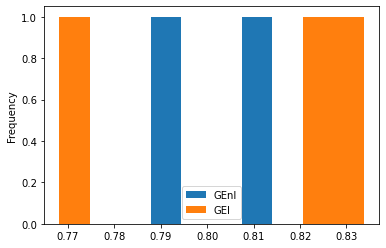

In [39]:
histogram = res.plot.hist()
print(histogram)
plt.x_title("Method")
plt.y_title("Accuracy")
plt.show()
